# K-Nearest Neighbor Assignment Tobigs15th 이성범

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# 데이터 확인

데이터셋의 이름 BlackFriday

### feature
- User_ID - 고객 ID
- Product_ID - 제품 ID
- Age - 고객 연령대
- Occupation - 고객 직업
- City_Category - 고객 거주 도시
- Stay_In_Current_City_Years - 현재 도시 거주 기간(년)
- Marital_Status - 결혼 여부
- Product_Category_1 - 구매 제품 분류(대)
- Product_Category_2 - 구매 제품 분류(중)
- Product_Category_3 - 구매 제품 분류(소)
- Purchase - 구매가격

### target
- Gender - 성별

캐글에 데이터셋에 대한 설명이 자세히 나와있지 않아 스스로 데이터를 해석하여 분석을 진행했습니다.

데이터셋의 제목인 BlackFriday의 경우 11월의 넷째주 목요일인 추수감사절 다음 날로, 미국에서 연중 가장 큰 규모의 쇼핑이 행해지는 날을 의미합니다.

현재 데이터의 경우 추후에 나올 분석 결과를 보면 알겠지만 동일한 제품이라도 변수에 특성에 따라서 구매가격이 달라진다는 것을 확인할 수 있습니다.

이를 유추해보면 미국에서 가장 큰 규모의 쇼핑이 행해지는 날인 BlackFriday는 대대적인 할인 행사를 진행하기 때문에 충분히 정보의 격차 또는 현재 지역의 규모 등 여러 특성에 따라서 할인율에 대한 정보 또는 혜택이 달라질 것이고 이에 따른 구매가격이 달라질 수 있다고 생각할 수 있습니다.

분석에 들어가기 전에 성별에 대해 크게 영향을 주는 변수는 대체로 고객 ID, 제품 ID, 고객 직업, 구매 제품 분류와 관련된 변수로 생각됩니다.

하지만 고객 ID의 경우 고유값이기 때문에 고객의 성별과 1대1로 매칭이 된다면 일반화가 되지 않기 때문에 제외하는 것이 맞을거 같습니다.

충분히 제품 ID, 즉 제품의 종류에 따라 구매하는 물건이 달라질 것이지만 제품 ID가 너무 많아서 원핫인코딩을 통한 모델을 만들면 메모리 부족 문제로 실행하지 못하여 제외하였습니다.

직업에 따라서 성별의 차이가 발생할 것이고 구매하는 제품에 따라서 선호하는 성별이 달라질 것이라고 생각하며 분석을 진행하겠습니다.

In [2]:
data = pd.read_csv('BlackFriday.csv')

In [3]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
data.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537567,1004736,P00157542,M,18-25,20,A,1,1,8,14.0,NaN,1994
537568,1004736,P00250642,M,18-25,20,A,1,1,11,NaN,NaN,5930
537569,1004736,P00023142,M,18-25,20,A,1,1,5,14.0,NaN,7042
537570,1004736,P00162442,M,18-25,20,A,1,1,1,16.0,NaN,15491
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [5]:
# 동일한 제품 ID의 경우 Product_Category가 동일하다는 것을 알 수 있다.
data[data['Product_ID'] == 'P00085442'].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
322,1000053,P00085442,M,26-35,0,B,1,0,12,14.0,NaN,1752
973,1000169,P00085442,M,26-35,7,B,3,0,12,14.0,NaN,1434
2024,1000323,P00085442,M,46-50,12,C,1,0,12,14.0,NaN,1714
11978,1001796,P00085442,M,51-55,11,C,2,1,12,14.0,NaN,1423


In [6]:
# 각 칼럼별 고유한 데이터의 값과 개수를 나타내는 함수
def getUniqueData(df, col):
    unique_data = df[col].unique()
    unique_count = df[col].nunique()
    print('='* 100)
    print(f'{col}의 고유한 데이터의 개수는: {unique_count}')
    if unique_count >= 50: print(f'{col}의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
    else: print(f'{col}의 고유한 데이터는: {unique_data}')
    print('='* 100)
    
cols = data.columns
for col in cols:
    getUniqueData(data, col)

User_ID의 고유한 데이터의 개수는: 5891
User_ID의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Product_ID의 고유한 데이터의 개수는: 3623
Product_ID의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Gender의 고유한 데이터의 개수는: 2
Gender의 고유한 데이터는: ['F' 'M']
Age의 고유한 데이터의 개수는: 7
Age의 고유한 데이터는: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation의 고유한 데이터의 개수는: 21
Occupation의 고유한 데이터는: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category의 고유한 데이터의 개수는: 3
City_Category의 고유한 데이터는: ['A' 'C' 'B']
Stay_In_Current_City_Years의 고유한 데이터의 개수는: 5
Stay_In_Current_City_Years의 고유한 데이터는: ['2' '4+' '3' '1' '0']
Marital_Status의 고유한 데이터의 개수는: 2
Marital_Status의 고유한 데이터는: [0 1]
Product_Category_1의 고유한 데이터의 개수는: 18
Product_Category_1의 고유한 데이터는: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2의 고유한 데이터의 개수는: 17
Product_Category_2의 고유한 데이터는: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3의 고유한 데이터의 개수는: 15
Product_Category_3의 고유한 데이터는: [nan 14. 17.  5.  4. 16. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


User_ID를 통하여 현재 주어진 데이터는 5891명의 고객 데이터임을 알 수 있다.

Product_ID를 통하여 현재 주어진 데이터는 3623개의 제품이 존재함을 알 수 있다.

또한 Purchase를 제외한 모든 변수가 범주형 변수로 해석되어야 함도 알 수 있다.

결측치가 존재하는 Product_Category의 경우 구매하는 제품이 대분류에는 속하지만 그 밑에 분류에는 해당되는 값이 없다고 할 수 있다. 따라서 결측치를 따로 채울수는 없을 것이며 사용을 한다면 Product_Category_1만을 사용하는 것이 바람직한 방법이라고 생각된다.

주어진 데이터는 5891명의 고객의 구매한 제품에 대한 데이터라고 볼 수 있다.

# Data Preprocessing

1. Purchase를 제외한 모든 변수가 사실상 범주형 변수이기 때문에 모든 변수를 범주형 변수로 바꾸어 주는 과정을 진행한다.

2. 동일한 상품의 경우 Product_Category가 같기 때문에 Product_Category를 하나로 묶어서 현재 데이터에 존재하는 모든 상품의 카테고리를 얻을 수 있을 것이다.

In [8]:
# Product_Category를 하나로 묶어 전체 제품의 카테고리를 의미하는 Product_Category_total을 새롭게 만들었다.
data['Product_Category_total'] = data.apply(lambda x : str(x['Product_Category_1']) + '_' + str(x['Product_Category_2']) + '_' + str(x['Product_Category_3']), axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Product_Category_total      537577 non-null  object 
dtypes: float64(2),

Product_Category의 경우 대, 중, 소 분류로 나누어지지만 대분류에는 속하지만 중, 소 분류에 속하지 않은 데이터가 존재하므로

Product_Category를 하나로 묶어 전체 제품의 카테고리를 의미하는 Product_Category_total을 새롭게 만들었다.

추후에 범주형 데이터의 경우 원핫인코딩을 사용할 예정이므로 정수형 변수의 경우 문자형 변수로 변경해주는 과정을 진행하겠다.

In [10]:
data['Occupation'] = data['Occupation'].astype(str)
data['Marital_Status'] = data['Marital_Status'].astype(str)
data['Product_Category_1'] = data['Product_Category_1'].astype(str)

# 타겟 데이터 라벨 인코딩
# F = 1 (여성)
# M = 0 (남성)
data['target'] = data['Gender'].map(lambda x : 1 if x == 'F' else 0)

In [11]:
cols = data.columns
for col in cols:
    getUniqueData(data, col)

User_ID의 고유한 데이터의 개수는: 5891
User_ID의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Product_ID의 고유한 데이터의 개수는: 3623
Product_ID의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Gender의 고유한 데이터의 개수는: 2
Gender의 고유한 데이터는: ['F' 'M']
Age의 고유한 데이터의 개수는: 7
Age의 고유한 데이터는: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation의 고유한 데이터의 개수는: 21
Occupation의 고유한 데이터는: ['10' '16' '15' '7' '20' '9' '1' '12' '17' '0' '3' '4' '11' '8' '19' '2'
 '18' '5' '14' '13' '6']
City_Category의 고유한 데이터의 개수는: 3
City_Category의 고유한 데이터는: ['A' 'C' 'B']
Stay_In_Current_City_Years의 고유한 데이터의 개수는: 5
Stay_In_Current_City_Years의 고유한 데이터는: ['2' '4+' '3' '1' '0']
Marital_Status의 고유한 데이터의 개수는: 2
Marital_Status의 고유한 데이터는: ['0' '1']
Product_Category_1의 고유한 데이터의 개수는: 18
Product_Category_1의 고유한 데이터는: ['3' '1' '12' '8' '5' '4' '2' '6' '14' '11' '13' '15' '7' '16' '18' '10'
 '17' '9']
Product_Category_2의 고유한 데이터의 개수는: 17
Product_Category_2의 고유한 데이터는: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3의 고유한 데이터

# EDA

### User_ID - 고객 ID

In [12]:
user_count = data['User_ID'].nunique()
user_gender_cout = len(data.groupby(['User_ID', 'Gender']).count().index)

print(f'현재 데이터의 고객의 수: {user_count}')
print(f'현재 데이터에서 고객의 성별 모두 1대1로 매칭이 되느냐? {user_count == user_gender_cout}')

현재 데이터의 고객의 수: 5891
현재 데이터에서 고객의 성별 모두 1대1로 매칭이 되느냐? True


고객 ID의 경우 고유값이기 때문에 고객과의 성별과 1대1로 매칭이 된다.

이는 모델을 평가할 때 고객 ID를 픽쳐로 활용한다면 고객별로 성별을 분류해주기 때문에 아마 유의미한 픽쳐의 역할을 해줄 것이다.

하지만 우리의 목표는 일반화된 모델을 만드는 것이다. 따라서 User_ID의 경우 고유값이기 때문에 고객과의 성별과 1대1로 매칭이 되기 때문에 사용하지 않을 것이다.

### Product_ID - 제품 ID

In [13]:
product_count = data['Product_ID'].nunique()
print(f'현재 데이터에 존재하는 제품의 수: {product_count}')

현재 데이터에 존재하는 제품의 수: 3623


충분히 제품의 종류에 따라 구매하는 물건이 달라질 것이지만 제품 ID가 너무 많아서 원핫인코딩을 통하여 모델을 만들면 메모리 부족 문제가 발생하여 실행을 하지 못하였습니다.

메모리 부족 문제로 현 칼럼은 사용할 수 없었습니다.

### Purchase - 구입 가격

In [14]:
data[
    (data['Product_ID'] == 'P00248942') &
    (data['Gender'] == 'M') &
    (data['Age'] == '18-25') &
    (data['Occupation'] == '4') &
    (data['City_Category'] == 'A') &
    (data['Stay_In_Current_City_Years'] == '0') &
    (data['Product_Category_1'] == '1') &
    (data['Product_Category_2'] == 6) &
    (data['Product_Category_3'] == 14)
]

# 동일한 제품이며
# 다른 픽쳐들도 동일하지만 
# 가격이 다르다는 사실을 알 수 있다.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_total,target
405,1000068,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,11429,1_6.0_14.0,0
373276,1003509,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,19601,1_6.0_14.0,0
536492,1004567,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,19132,1_6.0_14.0,0


Purchase의 경우 동일한 제품이며 다른 픽쳐들도 동일하지만 구매 가격이 다른 것을 확인할 수 있다. 이는 사람의 개인적인 역량(할인을 더 시키기위해 하는 활동)이 제품을 구매하는데 큰 영향을 줄 수 있다는 것을 의미한다. 성별에 따라서 제품을 구매하는 가격의 차이는 충분히 존재하겠지만 User_ID를 제외한 모든 픽쳐가 동일한 상태에서 Purchase가 다른 경우가 발생되기 때문에 모델이 성별을 분류하는데 악영향을 줄 것이라고 생각된다. 따라서 모델 예측에는 활용하지 않을 것이다.

## 데이터 셋을 어떻게 나눌 것인가?

In [15]:
# 중복되는 유저ID를 제거하여 고객의 신상정보에 대한 전체 칼럼을 구한다.
drop_data = data.drop_duplicates(['User_ID'])

cols = drop_data.columns
for col in cols:
    getUniqueData(drop_data, col)

User_ID의 고유한 데이터의 개수는: 5891
User_ID의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Product_ID의 고유한 데이터의 개수는: 1611
Product_ID의 고유한 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
Gender의 고유한 데이터의 개수는: 2
Gender의 고유한 데이터는: ['F' 'M']
Age의 고유한 데이터의 개수는: 7
Age의 고유한 데이터는: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation의 고유한 데이터의 개수는: 21
Occupation의 고유한 데이터는: ['10' '16' '15' '7' '20' '9' '1' '12' '17' '0' '3' '4' '11' '8' '19' '2'
 '18' '5' '14' '13' '6']
City_Category의 고유한 데이터의 개수는: 3
City_Category의 고유한 데이터는: ['A' 'C' 'B']
Stay_In_Current_City_Years의 고유한 데이터의 개수는: 5
Stay_In_Current_City_Years의 고유한 데이터는: ['2' '4+' '3' '1' '0']
Marital_Status의 고유한 데이터의 개수는: 2
Marital_Status의 고유한 데이터는: ['0' '1']
Product_Category_1의 고유한 데이터의 개수는: 18
Product_Category_1의 고유한 데이터는: ['3' '8' '1' '5' '6' '2' '13' '4' '16' '11' '15' '18' '12' '10' '7' '14'
 '9' '17']
Product_Category_2의 고유한 데이터의 개수는: 17
Product_Category_2의 고유한 데이터는: [nan  2.  8. 14.  5.  4. 17.  6. 11. 12. 16. 15. 10.  9.  3. 13. 18.  7.]
Product_Category_3의 고유한 데이터

우리는 앞에서 고객 ID와 성별이 1대1로 매칭된다는 것을 알게 되었다.

그리고 위 결과를 통하여 고객 ID에 대하여 고객의 신상정보와 관련된 데이터는 모두 1대1로 매칭되어 있다는 것을 확인했다.

그러면 고객의 신상정보와 관련된 데이터가 오버샘플링 되어 있다는 것을 의미한다.

예를 들어 1번 고객이 3종류의 다른 물건을 구입하였는데 레코드는 3개가 남기 때문에 신상정보에 대한 데이터도 동일한 값이 3개가 기록되어 의미 없는 데이터가 축적되었다는 것이다.

이는 모델에 넣었을 때 1번 고객이 10개의 물건을 구입하였고 그의 성별은 F이고 직업이 1이라면 각각 10개의 데이터가 들어가 있을 것이다. 

그리고 2번 고객이 5개의 물건을 구입하였고 그의 성별이 F이고 직업이 2라면 각각 5개의 데이터가 들어가 있을 것이다.

그러면 모델은 F라는 성별을 예측하는데 1이라는 직업이 더 많이 존재하기 때문에 직업 2보다 더 중요하게 여길 것이다.

그렇다면 이는 사실상 모델이 직업의 중요성을 가지고 판단한 것이 아닌 더 많은 물건을 구매한 고객을 중요하게 여겨 값을 예측한 것이 된다. 이는 제대로된 예측을 했다고 볼 수 없다.

따라서 이제 우리는 선택을 해야한다.

중복되는 고객 ID에 대한 데이터를 제거하여 고객 신상정보를 바탕으로 성별을 예측할 것인지

아니면 고객 신상정보 데이터를 활용하지 않고 제품과 관련된 정보를 바탕으로 성별을 예측할 것이지 선택해야 한다.

고객의 신상정보 데이터를 바탕으로 성별을 예측한다면 우리는 고객의 수인 5891개의 데이터만을 활용할 수 있다.

하지만 제품과 관련된 정보를 바탕으로 성별을 예측한다면 총 537577개의 모든 데이터를 사용할 수 있게 된다.

왜냐하면 성별에 따라 선호하는 제품이 존재한다고 가정하면 고객 1명이 여러 종류의 제품을 구매하고 그에 대한 모든 기록이 저장되어 있기 때문이다. 

결론을 말하자면 무엇이 좋은 방법이라고 결단이 서지 않는다. 그래서 베이스 라인 모델을 만들어 모델의 성능을 비교하여 더 나은 방식을 선택하겠다.

### 고객 신상정보 관련 feature로 만들어진 모델의 성능
### 사용 데이터: 중복으로 저장된 데이터를 모두 제외한 고유한 데이터 5891개

Text(0.5, 1.0, '고유한 데이터에서의 성별 비율 약 7 대 3')

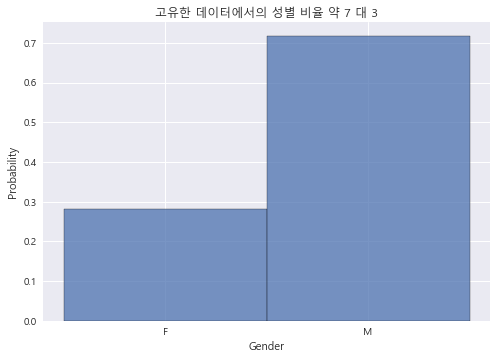

In [16]:
sns.histplot(data=drop_data, x='Gender', stat='probability')
plt.title('고유한 데이터에서의 성별 비율 약 7 대 3')

모든 데이터를 M으로 예측해도 성능은 70% 이상이기 때문에 기준을 70%로 선택한다.

모델은 속도가 빠른 LogisticRegression을 활용하겠다.

In [17]:
# 고객 신상 정보와 관련된 컬럼
cols_user = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
# LogisticRegression에 넣기 위한 원핫인코딩
X_user = pd.get_dummies(drop_data[cols_user])

target = 'target'
y_user = drop_data[target]

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=22)
model.fit(X_user, y_user)
model.score(X_user, y_user)

0.7365472755050076

모델 예측 결과 73%의 데이터를 맞추었다는 것을 알 수 있다.

기준보다 더 높은 값을 보이기 때문에 제대로 된 예측을 했다고 볼 수 있다.

### 제품 관련 feature로 만들어진 모델의 성능
### 사용 데이터: 537577개의 모든 데이터

Text(0.5, 1.0, '전체 데이터에서의 성별 비율 약 7.5 대 2.5')

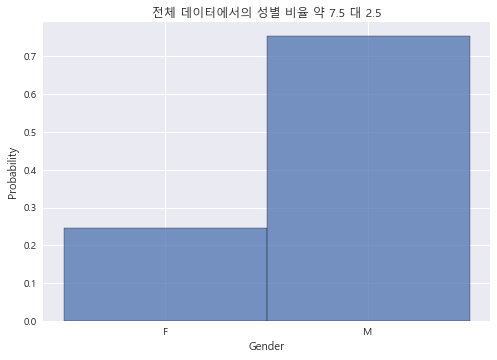

In [19]:
sns.histplot(data=data, x='Gender', stat='probability')
plt.title('전체 데이터에서의 성별 비율 약 7.5 대 2.5')

모든 데이터를 M으로 예측해도 성능은 75% 이상이기 때문에 기준을 75%로 선택한다.

모델은 속도가 빠른 LogisticRegression을 활용하겠다.

In [20]:
# 제품 정보와 관련된 컬럼
cols_product = ['Product_Category_1', 'Product_Category_total']
# LogisticRegression에 넣기 위한 원핫인코딩
X_product = pd.get_dummies(data[cols_product])

target = 'target'
y_product = data[target]

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=22)
model.fit(X_product, y_product)
model.score(X_product, y_product)

0.7540873214441838

모델 예측 결과 75%의 데이터를 맞추었다는 것을 알 수 있다.

기준과 동일한 값을 보이기 때문에 제대로 된 예측을 했다고 볼 수 없다.

### 베이스 라인 모델을 통하여 내린 결론

개인적으로 데이터가 많으면 많을 수록 좋다고 생각하며 제품과 관련된 정보 자체가 더 성별을 예측하는데 일반화된 모델을 만든다고 생각되어 제품과 관련된 정보를 바탕으로 성별을 예측하는 것이 좋다고 생각했으나

모델의 결과로는 고객의 신상정보를 바탕으로 모델을 예측하는 것이 더 높은 성능을 보였다. (전체 데이터의 특징을 나타내는 Product_ID를 사용할 수 없었던 것이 큰 영향을 주었을 수도 있으며 Product_ID를 사용할 수 있었다면 결과가 바뀌었을 수도 있다.)

따라서 앞으로 중복되는 고객 ID에 대한 데이터를 제거하여 고객 신상정보를 바탕으로 성별을 예측할 것이다.

위 결과를 한번 생각해보자면 고객의 신상 정보는 성별에 영향을 준다는 것을 알 수 있다.

하지만 제품도 충분히 고객의 성별을 분류하는데 큰 영향을 줄 것이다. 또한 현재 데이터의 경우 한가지만의 경우를 선택하여 사용할 수 밖에 없기 때문에 위와 같은 선택을 한 것이지 만약에 제대로된 데이터라면 모든 칼럼을 활용한 일반화된 좋은 성능의 모델을 만들 수 있을 것이다.

## 고객 신상정보 관련 feature

### Age - 고객 연령대

<AxesSubplot:xlabel='Age', ylabel='count'>

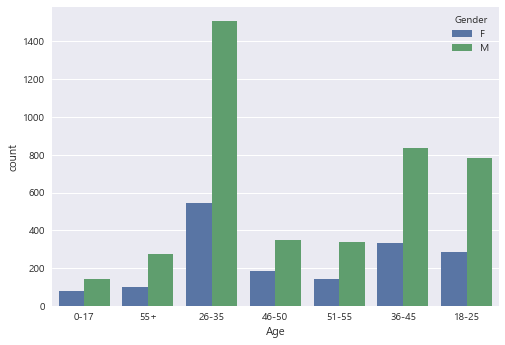

In [22]:
sns.countplot(data=drop_data, x='Age', hue='Gender')

### Occupation - 고객 직업

<AxesSubplot:xlabel='Occupation', ylabel='count'>

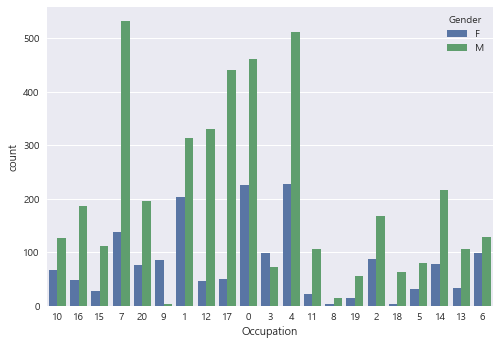

In [23]:
sns.countplot(data=drop_data, x='Occupation', hue='Gender')

### City_Category - 고객 거주 도시

<AxesSubplot:xlabel='City_Category', ylabel='count'>

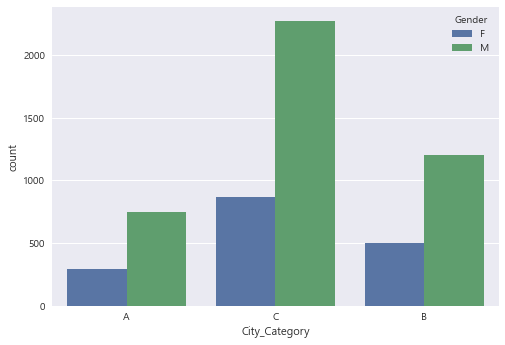

In [24]:
sns.countplot(data=drop_data, x='City_Category', hue='Gender')

### Stay_In_Current_City_Years - 현재 도시 거주 기간(년)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

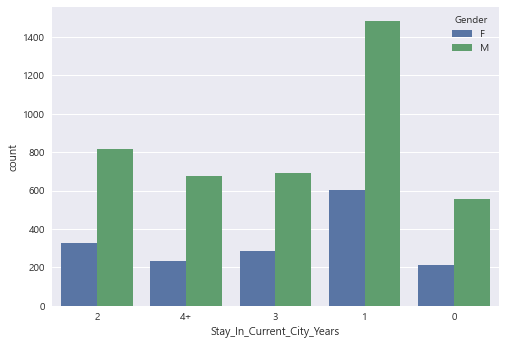

In [25]:
sns.countplot(data=drop_data, x='Stay_In_Current_City_Years', hue='Gender')

### Marital_Status - 결혼 여부

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

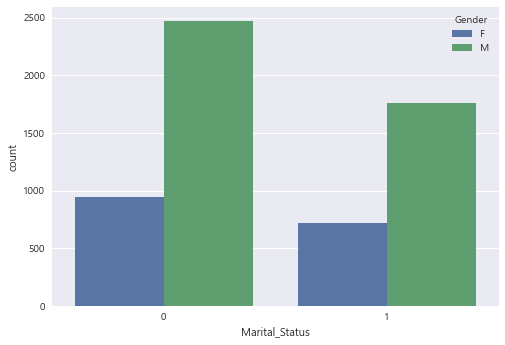

In [26]:
sns.countplot(data=drop_data, x='Marital_Status', hue='Gender')

## 고객 신상정보 관련 feature EDA 결과

전체 데이터의 성별의 비율이 매우 불균형한 이유도 있겠지만 크게 성별에 영향을 주는 feature를 찾을 수 없었다. 

하지만 통계적으로 연령대가 높아질 수록 여성의 비율이 높아지며 도시에 사느냐 지방에 사느냐 등에 따라 남녀 성비의 비율이 달라지며 직업에 따라서도 남녀 성비의 비율이 달라진다고 생각한다.

따라서 Age, Occupation, City_Category를 최종적으로 사용할 예정이다. 

## 제품 관련 feature

### Product_Category

결측치가 존재하는 Product_Category의 2와 3의 경우 구매하는 제품이 대분류에는 속하지만 그 밑에 분류에는 해당되는 값이 없다고 할 수 있다.

따라서 결측치를 따로 채울수는 없을 것이며 사용을 한다면 Product_Category_1만을 사용하는 것이 바람직한 방법이라고 생각된다.

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

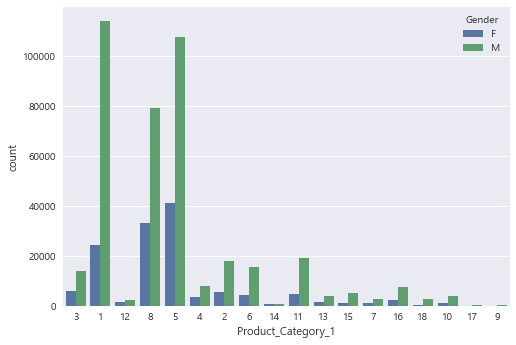

In [27]:
sns.countplot(data=data, x='Product_Category_1', hue='Gender')

<AxesSubplot:xlabel='Product_Category_total', ylabel='count'>

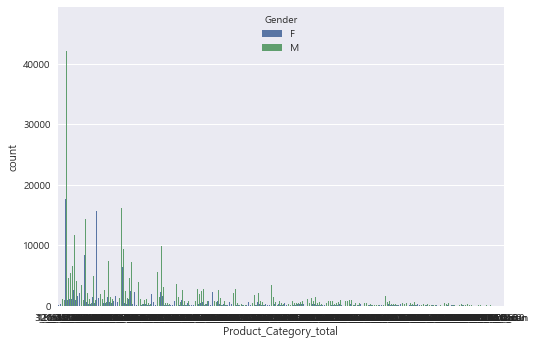

In [28]:
sns.countplot(data=data, x='Product_Category_total', hue='Gender')

## 제품 관련 feature EDA 결과

전체 제품의 카테고리별 그래프를 볼때 여성의 비율이 압도적인 제품이 몇몇 존재한다는 것을 알 수 있다. 하지만 전체 픽쳐대비 그 수가 매우 적기 때문에 모델이 잘 반영할 수 없어서 위와 같은 결과가 나왔다고 생각된다.

만약에 메모리가 많아서 Product_ID를 원핫인코딩하여 사용할 수 있다면 더 높은 성능의 모델을 만들 수 있을 것이다.

현재는 베이스라인 모델의 결과인 고객신상정보 관련 feature을 가지고 모델을 만들겠다. 

### Gender - 성별

<AxesSubplot:xlabel='Gender', ylabel='Probability'>

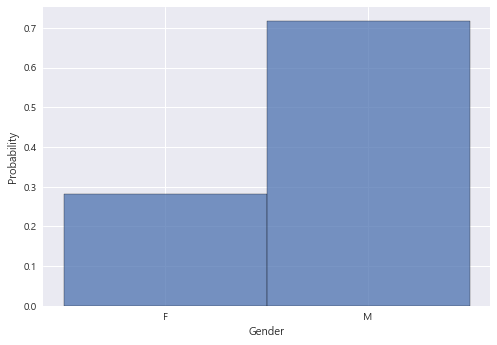

In [29]:
sns.histplot(data=drop_data, x='Gender', stat='probability')

<AxesSubplot:xlabel='Gender', ylabel='Probability'>

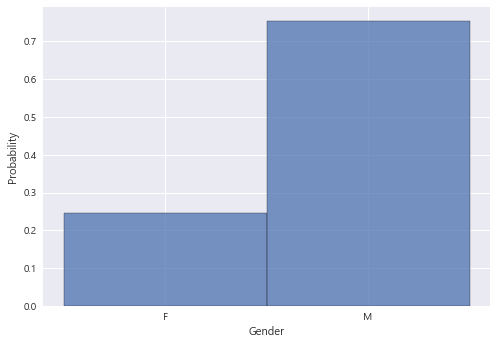

In [30]:
sns.histplot(data=data, x='Gender', stat='probability')

확실히 target 값이 매우 불균형하다는 것을 확인할 수 있다.

따라서 Test 데이터와 Train 데이터를 분리할 때 stratify하게 데이터를 분리할 예정이다.

# Model

In [31]:
# Train과 Test 데이터로 데이터를 분리하겠다.
cols = ['Age', 'Occupation', 'City_Category']
# 원핫인코딩
features = pd.get_dummies(drop_data[cols]).reset_index(drop=True)
target = drop_data[['target']].reset_index(drop=True)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22, stratify=target, test_size=0.2)

Text(0.5, 1.0, 'Test')

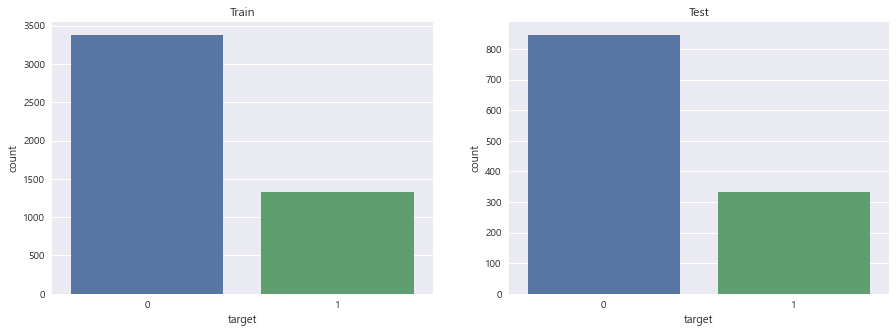

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.countplot(data=y_train, x='target', ax=ax[0])
sns.countplot(data=y_test, x='target', ax=ax[1])
ax[0].set_title('Train')
ax[1].set_title('Test')

target 값이 일정하게 분류되었음을 확인할 수 있다.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'Hyperparameter Tuning 전의 점수: {score:.6f}')

Hyperparameter Tuning 전의 점수: 0.654792


# Hyperparameter Tuning

개인적으로 하이퍼 파라미터 튜닝을 할때 검증 데이터 셋에 점수의 평균이 아닌

분리된 각각의 데이터로 학습된 전체 검증 데이터와 전체 학습 데이터를 비교하여 성능을 비교하는 편이다.

밑의 코드는 그 과정을 나타낸 것이다.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm # 모델 학습에 걸리는 시간을 측정하기 위한 라이브러리

k_range = [i for i in range(1,50)]  # k를 1~49까지 고려하여 최적의 k를 찾는다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트

n_split = 5 # 데이터를 5조각 내겠다.
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22) # Stratify한 데이터 분리


for k in tqdm(k_range) :
    knn = KNeighborsClassifier(k) # 모델을 만듬
    knn_oof_train = np.zeros(y_train.shape[0]) # 모델 예측 값이 저장될 배열
    
    for trn_idx, val_idx in skf.split(X_train, y_train):
        trn_data, trn_label = X_train.iloc[trn_idx], y_train.iloc[trn_idx] # 모델 학습에 사용할 데이터
        val_data, val_label = X_train.iloc[val_idx], y_train.iloc[val_idx] # 모델 검증에 사용할 데이터
        knn.fit(trn_data, trn_label) # 모델 학습
        
        knn_oof_train[val_idx] = knn.predict(val_data) # 검즘 데이터를 저장함
        
    scores = accuracy_score(y_train, knn_oof_train) # y_train과 각각의 검증 셋으로 구해진 점수를 전체적으로 비교함
    k_score.append(scores)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:44<00:00,  1.09it/s]


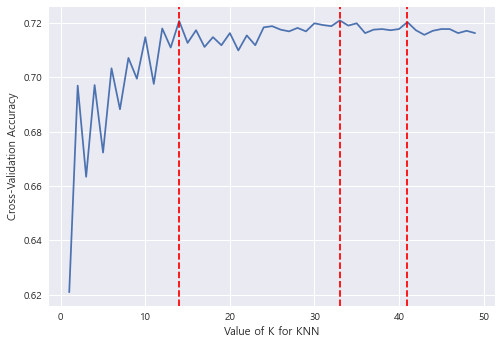

In [36]:
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.axvline(14, linestyle='--', color='r')
plt.axvline(33, linestyle='--', color='r')
plt.axvline(41, linestyle='--', color='r')
plt.show()

In [37]:
best_score = max(k_score)
best_score_index = k_score.index(best_score)
besk_k = k_range[best_score_index]
print(f"현재 평가결과 최고의 점수는 {best_score:.6f}, \n최고 점수의 k는 {besk_k}")

현재 평가결과 최고의 점수는 0.720925, 
최고 점수의 k는 33


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = besk_k)
knn.fit(X_train, y_train)

pred = knn.predict(X_test) # Evaluation에 활용할 예측 값을 구한다
pred_proba_c1 = knn.predict_proba(X_test)[:,1] # Evaluation에 활용할 라벨 1에 대한 데이터 예측 확률 값을 구한다.

score = knn.score(X_test, y_test)
print(f'Hyperparameter Tuning 후의 점수: {score:.6f}')

Hyperparameter Tuning 후의 점수: 0.727735


#### 튜닝 전
- 0.654792

#### 튜닝 후
- 0.727735

하이퍼 파라미터 튜닝을 거쳐서 최적의 k인 33을 찾았고 그를 모델에 넣어 예측한 결과 성능이 약 0.7가까이 더 향상되었다는 것을 확인할 수 있다.

# Evaluation

In [39]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix을 함수로 구현
def get_clf_eval(y_test, y_predict, title):
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    print("-"*90)
    print(f'{title}')
    print("-"*90)
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_predict))
    print("-"*90)
    accuracy = (tp+tn) / (tp+fn+fp+tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f'Accuracy : {accuracy:.5f}, Precision : {precision:.5f}, Recall : {recall:.5f}, F1 : {f1:.5f}')
    print("-"*90)

get_clf_eval(y_test, pred, 'KNN (임계치 0.5 기준)')

------------------------------------------------------------------------------------------
KNN (임계치 0.5 기준)
------------------------------------------------------------------------------------------
Confusion Matrix
[[844   2]
 [319  14]]
------------------------------------------------------------------------------------------
Accuracy : 0.72774, Precision : 0.87500, Recall : 0.04204, F1 : 0.08023
------------------------------------------------------------------------------------------


Accuracy는 상대적으로 높지만 모든 값을 대체로 FN  즉, 1(여성)인 실제 값을 모두 0으로 예측한다는 것을 알 수 있다.

따라서 현재 모델은 임계치 0.5기준으로 모든 값을 0(남성)으로 예측하는 아주 좋지 못한 성능을 가지고 있다. 이에 Precision값이 Recall과 F1에 비해 상대적으로 매우 높다는 것을 알 수 있다.

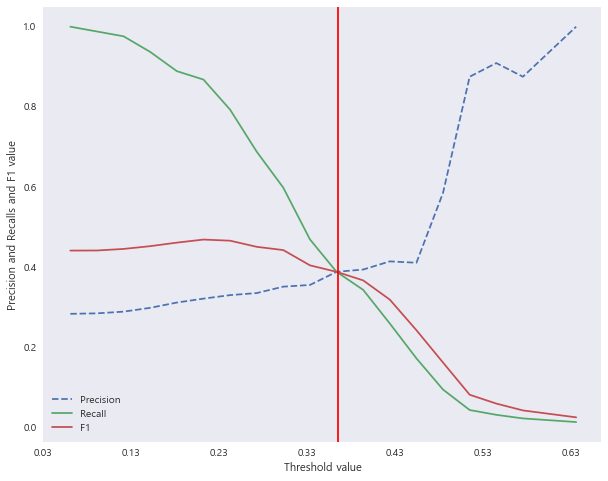

정밀도가 최대인 값 : 1.00000, 최대의 정밀도를 가지는 임계치 : 0.63636
재현율이 최대인 값 : 1.00000, 최대의 재현율을 가지는 임계치 : 0.06061
F1 점수가 최대인 값: 0.46802, 최대의 F1 점수를 가지는 임계치: 0.21212


In [40]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율과 F1스코어을 그래프화 시키기 위한 함수
def precision_recall_curve_plot_and_f1(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    f1 = 2 * (precisions * recalls) / (precisions + recalls)

    plt.figure(figsize=(10,8))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='Recall')
    plt.plot(thresholds, f1[0:threshold_boundary], linestyle='-', label='F1')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.axvline(x=0.365, c='r')

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recalls and F1 value')
    plt.legend()
    plt.grid()
    plt.show()
    
    return precisions[0:threshold_boundary], recalls[0:threshold_boundary], f1[0:threshold_boundary], thresholds 

precision, recall, f1, threshold = precision_recall_curve_plot_and_f1(y_test, pred_proba_c1)

precision = precision.tolist()
recall = recall.tolist()
f1 = f1.tolist()
threshold = threshold.tolist()

max_precision = max(precision)
max_precision_idx = precision.index(max_precision)
max_precision_threshold = threshold[max_precision_idx]

max_recall = max(recall)
max_recall_idx = recall.index(max_recall)
max_recall_threshold = threshold[max_recall_idx]

max_f1 = max(f1)
max_f1_idx = f1.index(max_f1)
max_f1_threshold = threshold[max_f1_idx]

print(f'정밀도가 최대인 값 : {max_precision:.5f}, 최대의 정밀도를 가지는 임계치 : {max_precision_threshold:.5f}')
print(f'재현율이 최대인 값 : {max_recall:.5f}, 최대의 재현율을 가지는 임계치 : {max_recall_threshold:.5f}')
print(f'F1 점수가 최대인 값: {max_f1:.5f}, 최대의 F1 점수를 가지는 임계치: {max_f1_threshold:.5f}')

Precision, Recall, F1의 전체적인 비율을 고려해서 임계치를 설정한다면 0.365가 적당하겠지만 모델 자체의 성능이 매우 좋지 않기 때문에 의미가 없다고 생각된다.

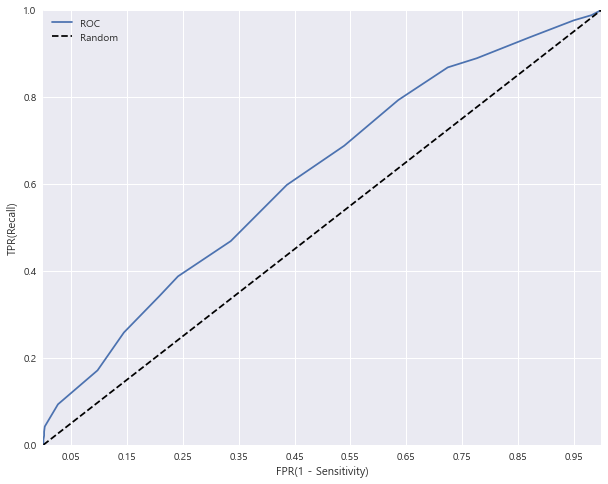

In [41]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_curve

# ROC curve and AUC Score를 그래프로 나타내기 위한 함수
def roc_curve_plot(y_test, pred_proba_c1):
    FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(10,8))
    # ROC 곡선을 그림
    plt.plot(FPRs, TPRs, label='ROC')
    # 가운데 대각선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, pred_proba_c1)

In [42]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred_proba_c1)
print(f'AUC Score : {auc:.5f}')

AUC Score : 0.61462


ROC 커브의 경우 가운데 직선에 가까울수록 랜덤하게 값을 예측한 모델로 매우 성능이 안좋다고 할 수 있으며

AUC Score의 경우 1에 가까울수록 매우 좋은 성능을 가졌다고 볼 수 있지만 현재 모델의 경우 AUC Score의 값이 0.5에 근사하므로 매우 좋지 못한 성능을 가지고 았다.

따라서 현재 만들어진 모델의 경우 매우 좋지 못한 성능을 가지고 있다.

# 결론

현재 모델의 경우 매우 좋지 못한 성능을 보이고 있다.

좋지 못한 성능을 보이는 이유는 성별을 예측하는데 적합하지 않은 데이터 셋 때문으로 생각되며 모델의 성능을 높이기 위해서는 성별 예측에 더 도움이 되는 다른 데이터를 수집하여야 할 것이다. 